In [52]:
import pandas as pd

# Load the CSV file
file_path = '/content/drive/MyDrive/Personal/Grad Program/CSC 587 - Adv Data Mining/Project/Curated Log Data BL#2.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the data
df.head()

,PPMI_COHORT,35,50,55,62,71,93,98,111,112,...,999925983,999926058,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119
0,Control,0.731768,-0.798850,-1.137471,0.383820,0.587303,0.223999,-0.180993,0.188229,0.281230,...,0.514556,0.075265,0.000000,-0.333566,-0.111533,0.034530,-0.088870,0.197221,0.103648,-0.719921
1,PD,0.292937,0.260915,0.099700,1.410015,0.028393,0.600868,0.263158,0.091365,1.396008,...,0.033282,-1.407253,0.045656,-0.531562,-0.168789,0.221036,0.058911,0.113740,0.151346,-0.587543
2,Control,0.246383,0.314824,0.325111,0.935141,-0.569361,0.375527,0.107619,0.339758,0.588795,...,-0.013386,0.226228,-2.025472,-0.454397,0.085085,-0.010333,-0.319140,-1.534212,-1.289569,0.073647
3,Control,-0.459301,-0.280314,0.542046,-0.728370,-0.339891,0.123959,-0.387232,0.316777,0.324062,...,-0.288898,-1.407253,-2.025472,-0.602134,0.019927,0.000000,-0.143942,-2.054922,1.508014,0.346150
4,PD,0.757960,-0.409671,0.124044,1.830303,1.531307,-0.643919,-0.699620,-0.819987,0.359760,...,5.792419,0.585375,-2.025472,-0.778444,-1.150457,-0.774700,-0.909086,-0.858797,-1.095774,0.193999


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Separate features and target
X = df.drop(columns=['PPMI_COHORT'])
y = df['PPMI_COHORT']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'Control' -> 0, 'PD' -> 1

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Train Support Vector Classifier
svc = SVC(kernel='rbf', C=1.0, gamma='scale')
svc.fit(X_train, y_train)

# Predict and evaluate
y_pred = svc.predict(X_test)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

report, conf_matrix


('              precision    recall  f1-score   support\n\n     Control       0.75      0.43      0.55         7\n          PD       0.60      0.86      0.71         7\n\n    accuracy                           0.64        14\n   macro avg       0.68      0.64      0.63        14\nweighted avg       0.67      0.64      0.63        14\n',
 array([[3, 4],
        [1, 6]]))

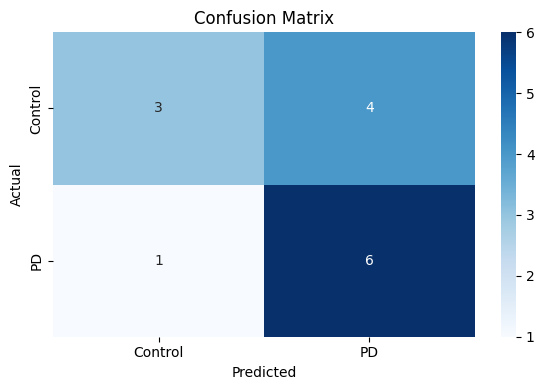

'Classification Report:\n              precision    recall  f1-score   support\n\n     Control       0.75      0.43      0.55         7\n          PD       0.60      0.86      0.71         7\n\n    accuracy                           0.64        14\n   macro avg       0.68      0.64      0.63        14\nweighted avg       0.67      0.64      0.63        14\n\nAccuracy: 0.64'

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Display classification report and accuracy
accuracy = (conf_matrix[0,0] + conf_matrix[1,1]) / conf_matrix.sum()
report_text = f"Classification Report:\n{report}\nAccuracy: {accuracy:.2f}"

report_text


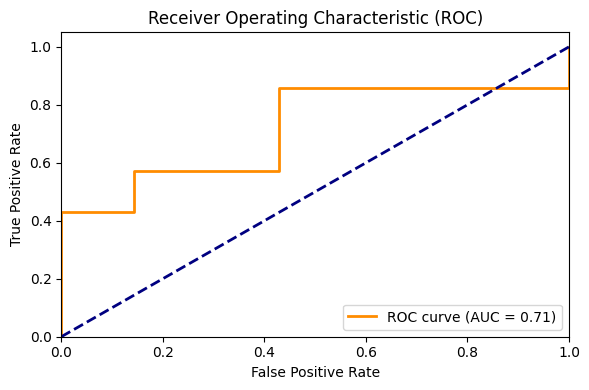

np.float64(0.7142857142857142)

In [59]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (PD)
y_prob = svc.decision_function(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

roc_auc


In [ ]:
import joblib

# Save the trained SVC model
joblib.dump(svc, 'svc_model.pkl')

# Save the scaler used for feature normalization
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
# Load the model and scaler when you need them
loaded_model = joblib.load('svc_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')



In [60]:
# Save the trained model and scaler
import joblib

model_path = "/content/drive/MyDrive/Personal/Grad Program/CSC 587 - Adv Data Mining/Project/Milestone 1/SVC Model/svc_model.pkl"
scaler_path = "/content/drive/MyDrive/Personal/Grad Program/CSC 587 - Adv Data Mining/Project/Milestone 1/SVC Model/scaler.pkl"

joblib.dump(svc, model_path)
joblib.dump(scaler, scaler_path)

model_path, scaler_path


('/content/drive/MyDrive/Personal/Grad Program/CSC 587 - Adv Data Mining/Project/Milestone 1/SVC Model/svc_model.pkl',
 '/content/drive/MyDrive/Personal/Grad Program/CSC 587 - Adv Data Mining/Project/Milestone 1/SVC Model/scaler.pkl')

In [ ]:
import pandas as pd
import joblib

# === Load the saved model and scaler ===
model = joblib.load('svc_model.pkl')
scaler = joblib.load('scaler.pkl')

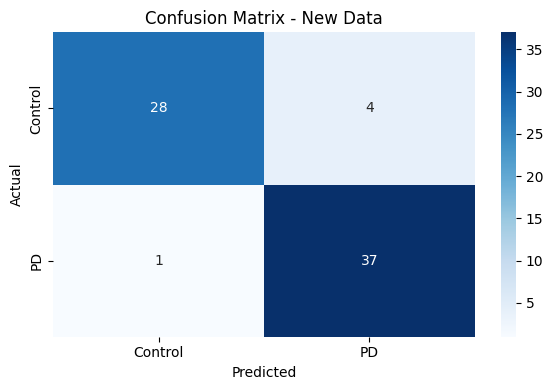

              precision    recall  f1-score   support

     Control       0.97      0.88      0.92        32
          PD       0.90      0.97      0.94        38

    accuracy                           0.93        70
   macro avg       0.93      0.92      0.93        70
weighted avg       0.93      0.93      0.93        70



In [61]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# === Load new dataset ===
# Replace 'your_new_data.csv' with the path to your new dataset
new_data = pd.read_csv('/content/drive/MyDrive/Personal/Grad Program/CSC 587 - Adv Data Mining/Project/Curated Log Data BL#2.csv')

# Load the true labels from the new dataset
true_labels = pd.read_csv('/content/drive/MyDrive/Personal/Grad Program/CSC 587 - Adv Data Mining/Project/Curated Log Data BL#2.csv')['PPMI_COHORT']

# Encode true labels to match the model's label format (0 or 1)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels_encoded, predictions)
report = classification_report(true_labels_encoded, predictions, target_names=label_encoder.classes_)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - New Data')
plt.tight_layout()
plt.show()

# Print classification report
print(report)

